The Sparks Foundation- GRIP- Data Science and Business Analytics- Aug-2021

Author : Suraj Shrimant Mane

Task5 : Exploratory Data Analysis - Sports

Level : Advanced

Language : Python

Software : Jupyter Notebook

Dataset-: https://bit.ly/34SRn3b


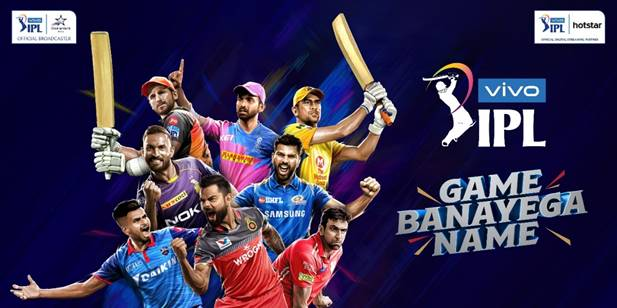

In [1]:
from IPython import display
display.Image("IPL.jpg", width=700, height=700)

# Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings; warnings.filterwarnings('ignore')

# Dataset reading

In [3]:
matches = pd.read_csv('matches.csv')
deliveries= pd.read_csv('deliveries.csv')

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Checking Null Values

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
matches.shape

(756, 18)

In [8]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# Separate the Columns

In [9]:
all_col = set(matches.columns)
all_col

{'city',
 'date',
 'dl_applied',
 'id',
 'player_of_match',
 'result',
 'season',
 'team1',
 'team2',
 'toss_decision',
 'toss_winner',
 'umpire1',
 'umpire2',
 'umpire3',
 'venue',
 'win_by_runs',
 'win_by_wickets',
 'winner'}

In [10]:
num_col = set(matches.describe().columns)
num_col

{'dl_applied', 'id', 'season', 'win_by_runs', 'win_by_wickets'}

In [11]:
cat_col = all_col - num_col
cat_col

{'city',
 'date',
 'player_of_match',
 'result',
 'team1',
 'team2',
 'toss_decision',
 'toss_winner',
 'umpire1',
 'umpire2',
 'umpire3',
 'venue',
 'winner'}

In [12]:
matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [13]:
matches.isna().sum().sort_values(ascending=False)

umpire3            637
city                 7
player_of_match      4
winner               4
umpire1              2
umpire2              2
toss_winner          0
season               0
date                 0
team1                0
team2                0
result               0
toss_decision        0
dl_applied           0
win_by_runs          0
win_by_wickets       0
venue                0
id                   0
dtype: int64

In [14]:
matches[matches.city.isna()][['city']]

,city
461,NaN
462,NaN
466,NaN
468,NaN
469,NaN
474,NaN
476,NaN


In [15]:
matches[matches.winner.isna()][['winner']]

,winner
300,NaN
545,NaN
570,NaN
744,NaN


In [16]:
# Drop all umpiers, only null values in city.

matches.drop('umpire1',axis=1, inplace=True)
matches.shape

(756, 17)

In [17]:
matches.drop('umpire2',axis=1, inplace=True)
matches.shape

(756, 16)

In [18]:
matches.drop('umpire3',axis=1, inplace=True)
matches.shape

(756, 15)

In [19]:
matches.drop('date',axis=1, inplace=True)
matches.shape

(756, 14)

In [20]:
matches.isna().sum().sort_values(ascending=False)

city               7
player_of_match    4
winner             4
venue              0
win_by_wickets     0
win_by_runs        0
dl_applied         0
result             0
toss_decision      0
toss_winner        0
team2              0
team1              0
season             0
id                 0
dtype: int64

In [21]:
matches.dropna(subset = ["winner"], inplace= True )

In [22]:
matches.isna().sum().sort_values(ascending=False)

city               7
venue              0
player_of_match    0
win_by_wickets     0
win_by_runs        0
winner             0
dl_applied         0
result             0
toss_decision      0
toss_winner        0
team2              0
team1              0
season             0
id                 0
dtype: int64

In [23]:
matches.dropna(subset = ["city"], inplace= True )

In [24]:
matches.isna().sum().sort_values(ascending=False)

venue              0
player_of_match    0
win_by_wickets     0
win_by_runs        0
winner             0
dl_applied         0
result             0
toss_decision      0
toss_winner        0
team2              0
team1              0
city               0
season             0
id                 0
dtype: int64

In [25]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 0 to 755
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               745 non-null    int64 
 1   season           745 non-null    int64 
 2   city             745 non-null    object
 3   team1            745 non-null    object
 4   team2            745 non-null    object
 5   toss_winner      745 non-null    object
 6   toss_decision    745 non-null    object
 7   result           745 non-null    object
 8   dl_applied       745 non-null    int64 
 9   winner           745 non-null    object
 10  win_by_runs      745 non-null    int64 
 11  win_by_wickets   745 non-null    int64 
 12  player_of_match  745 non-null    object
 13  venue            745 non-null    object
dtypes: int64(5), object(9)
memory usage: 87.3+ KB


In [26]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [27]:
deliveries.isna().sum().sort_values(ascending=False)

fielder             172630
player_dismissed    170244
dismissal_kind      170244
bowler                   0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
wide_runs                0
is_super_over            0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
match_id                 0
dtype: int64

In [28]:
deliveries.drop(['fielder','player_dismissed','dismissal_kind'],axis=1,inplace=True)

In [29]:
deliveries.isna().sum().sort_values(ascending=False)

total_runs       0
extra_runs       0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
match_id         0
dtype: int64

# Visualization

<AxesSubplot:title={'center':'Teams with Total No. of Matches won'}, ylabel='No. of Matches Won'>

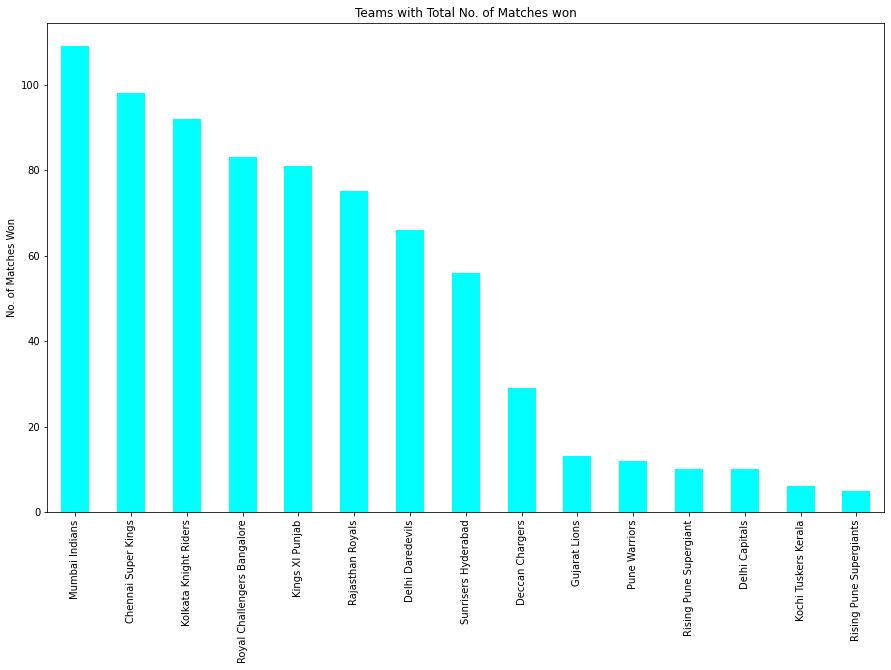

In [30]:
plt.figure(figsize=[15,9])
plt.title('Teams with Total No. of Matches won')
plt.ylabel('No. of Matches Won')
matches.winner.value_counts().plot(kind='bar', color='cyan')

<AxesSubplot:title={'center':'Player of the Match Won'}>

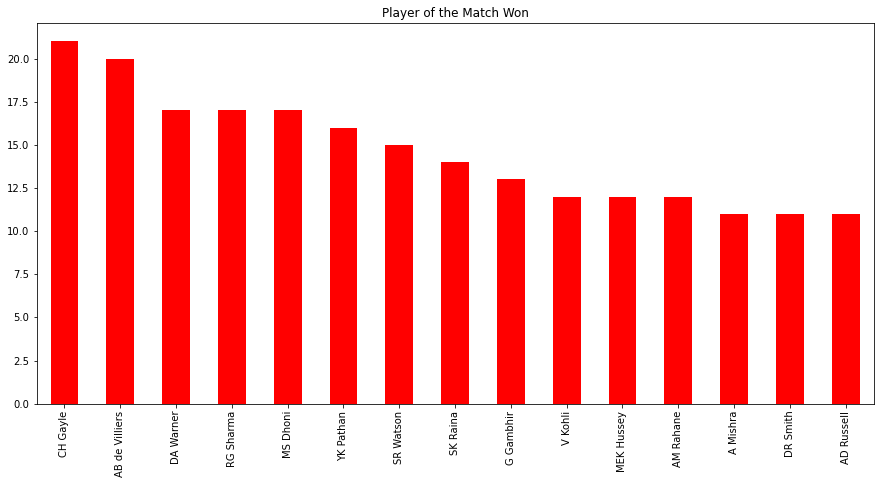

In [31]:
plt.figure(figsize=[15,7])
plt.title('Player of the Match Won')
matches.player_of_match.value_counts()[:15].plot(kind='bar', color='red')

In [32]:
season_data=matches[['id','season','winner']]

complete_data=deliveries.merge(season_data,how='inner',left_on='match_id',right_on='id')

In [33]:
wins_per_season = matches.groupby("season")["winner"].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

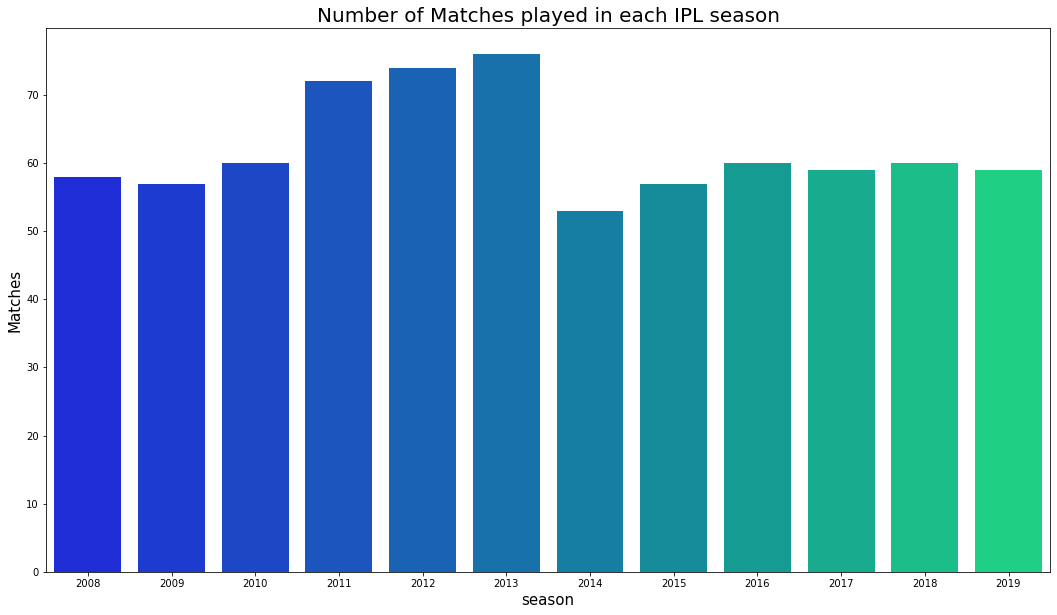

In [34]:
plt.figure(figsize = (18,10))
sns.countplot('season',data=matches,palette="winter")
plt.title("Number of Matches played in each IPL season",fontsize=20)
plt.xlabel("season",fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.show()

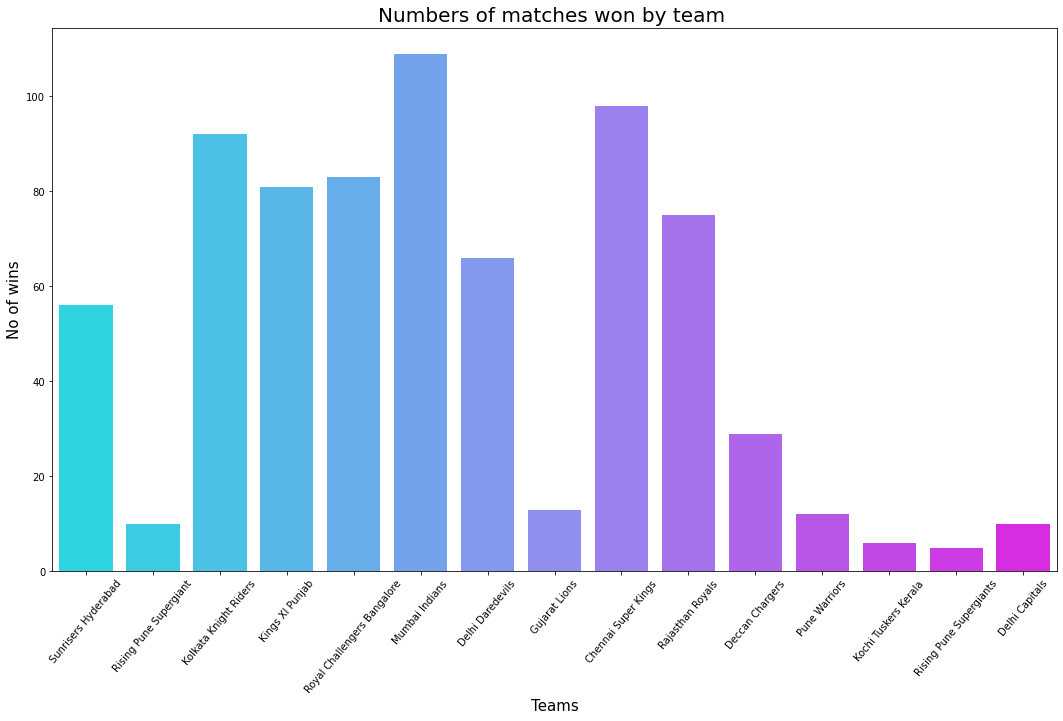

In [35]:
plt.figure(figsize = (18,10))
sns.countplot(x='winner',data=matches, palette='cool')
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

In [36]:
# we will print winner season wise
final_matches=matches.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')


,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


<BarContainer object of 2 artists>

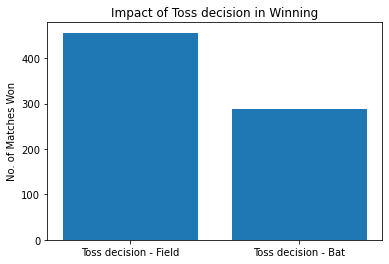

In [37]:
plt.title('Impact of Toss decision in Winning')
plt.ylabel('No. of Matches Won')
result1 = ['Toss decision - Field', 'Toss decision - Bat']
count1 = [matches[matches.toss_decision == 'field'].winner.count(), matches[matches.toss_decision == 'bat'].winner.count()]
plt.bar(result1, count1,)

In [38]:
# we will print toss winner, toss decision, winner in final matches.
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [39]:
# We will print IPL Finals venues and winners along with the number of wins.
final_matches.groupby(['venue','winner']).size()

venue                                      winner               
Dr DY Patil Sports Academy                 Chennai Super Kings      1
                                           Rajasthan Royals         1
Eden Gardens                               Mumbai Indians           2
M Chinnaswamy Stadium                      Kolkata Knight Riders    1
                                           Sunrisers Hyderabad      1
MA Chidambaram Stadium, Chepauk            Chennai Super Kings      1
                                           Kolkata Knight Riders    1
New Wanderers Stadium                      Deccan Chargers          1
Rajiv Gandhi International Stadium, Uppal  Mumbai Indians           1
Rajiv Gandhi Intl. Cricket Stadium         Mumbai Indians           1
Wankhede Stadium                           Chennai Super Kings      1
dtype: int64

In [40]:
# we will print number of season won by teams
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Rajasthan Royals         1
Deccan Chargers          1
Name: winner, dtype: int64

In [41]:
matches['win_by']=np.where(matches['win_by_runs']>0,'Bat first','Bowl first')

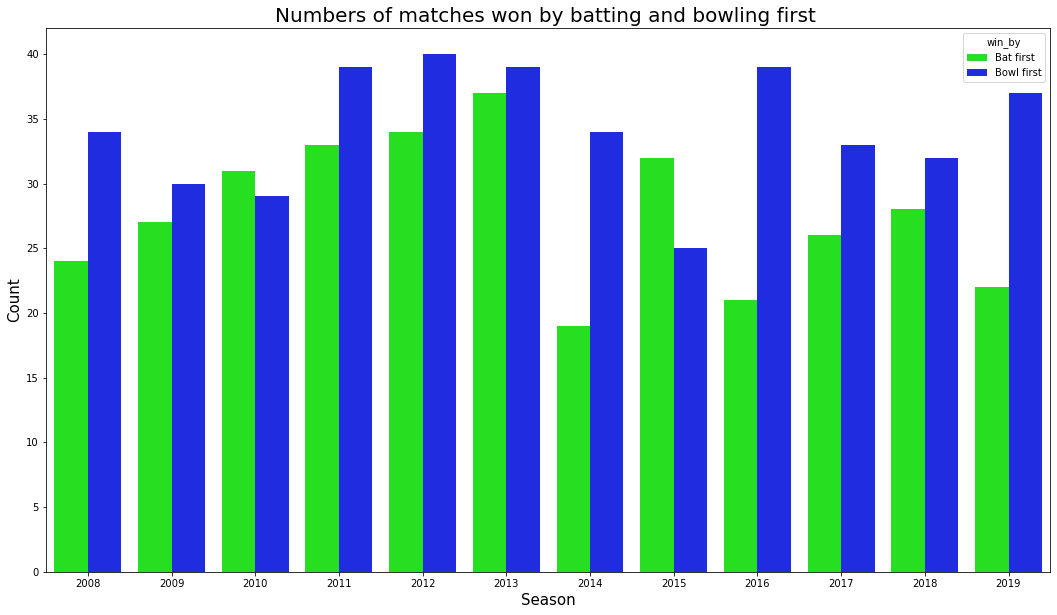

In [42]:
plt.figure(figsize = (18,10))
sns.countplot('season',hue='win_by',data=matches,palette="hsv")
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

<Figure size 1296x720 with 0 Axes>

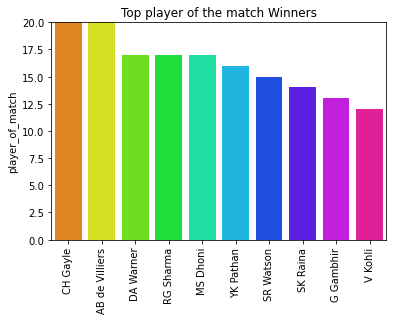

In [43]:
# we will print name of top player in IPL
plt.figure(figsize = (18,10))
top_players = matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="hsv");
plt.show()

<AxesSubplot:title={'center':'Teams with Total No. of Matches won'}, ylabel='No. of Matches Won'>

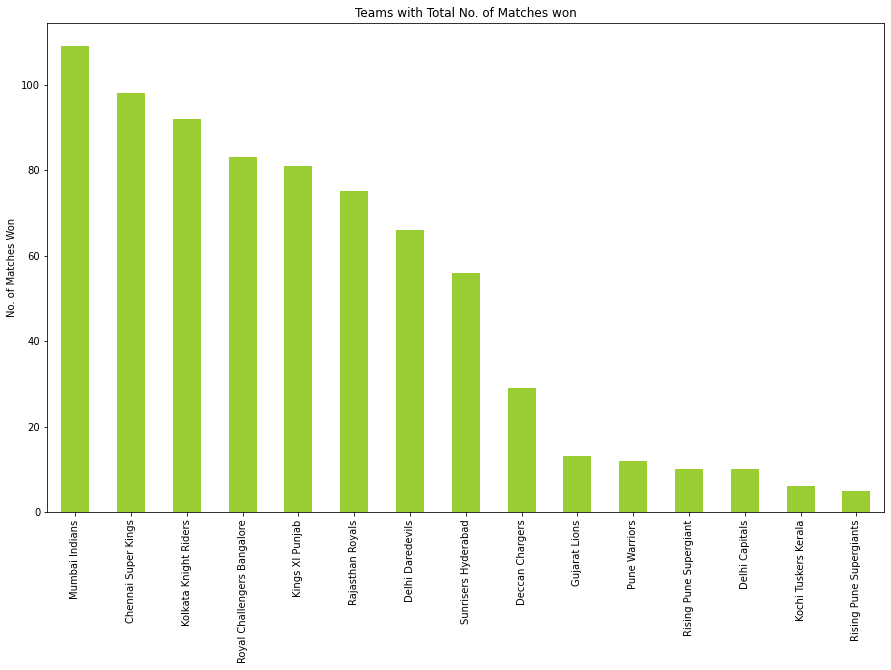

In [44]:
plt.figure(figsize=[15,9])
plt.title('Teams with Total No. of Matches won')
plt.ylabel('No. of Matches Won')
matches.winner.value_counts().plot(kind='bar', color='yellowgreen')

In [45]:
# we will print man of the match
final_matches[['winner','player_of_match','win_by_runs','win_by_wickets']].reset_index(drop=True)

,winner,player_of_match,win_by_runs,win_by_wickets
0,Mumbai Indians,KH Pandya,1,0
1,Rajasthan Royals,YK Pathan,0,3
2,Deccan Chargers,A Kumble,6,0
3,Chennai Super Kings,SK Raina,22,0
4,Chennai Super Kings,M Vijay,58,0
5,Kolkata Knight Riders,MS Bisla,0,5
6,Mumbai Indians,KA Pollard,23,0
7,Kolkata Knight Riders,MK Pandey,0,3
8,Mumbai Indians,RG Sharma,41,0
9,Sunrisers Hyderabad,BCJ Cutting,8,0


In [46]:
# we will print numbers of fours hit by team
four_data=complete_data[complete_data['batsman_runs']==4]
six_data=complete_data[complete_data['batsman_runs']==6]

four=four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])
six=six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

data_combine = pd.concat( [four,six] )
#because some teams didn't score fours and sixes so we need to fill the na values to 0
data_combine=data_combine.fillna('0')
data_combine

,runs by fours,fours,runs by six,sixes
batting_team,,,,
Chennai Super Kings,8696,2174,0,0
Deccan Chargers,3828,957,0,0
Delhi Capitals,968,242,0,0
Delhi Daredevils,8440,2110,0,0
Gujarat Lions,1840,460,0,0
Kings XI Punjab,9780,2445,0,0
Kochi Tuskers Kerala,680,170,0,0
Kolkata Knight Riders,9672,2418,0,0
Mumbai Indians,10216,2554,0,0


In [47]:
# We will print the top 10 leading run scorer in IPL
batsman_score=deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("*** Top 5 Leading Run Scorer in IPL ***")
batsman_score.iloc[:5,:]

*** Top 5 Leading Run Scorer in IPL ***


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632


# Conclusion :

The highest number of match won by Mumbai Indians.

It is interesting that out of 12 IPL finals,4 times the Mumbai Indians team that won the toss was also the winner of IPL.

Teams which Bowl first has higher chances of winning then the team which bat first.

In finals teams which decide to do fielding first win the matches more then the team which bat first.

In finals most teams after winning toss decide to do fielding first.

The IPL most wicket taken blower is SL Malinga.

The highest number of six hit by player is CH gayle.

Top leading run scorer in IPL are Virat kholi, SK Raina, RG Sharma.

The highest number of six hit by player is CH gayle.

The highest number of four hit by player is Shikar Dhawan.

Top player of match winning are CH gayle, AB de villers.

Thank You!